In [1]:
# LeNet for MNIST using Keras and TensorFlow

from keras.layers.convolutional import Convolution2D
from keras.layers.convolutional import MaxPooling2D
from keras.layers.core import Activation
from keras.layers.core import Flatten
from keras.layers.core import Dense
from keras.models import Sequential
from keras.optimizers import SGD
from keras.utils import np_utils
from sklearn.model_selection import train_test_split
from sklearn import datasets
import numpy as np


Using TensorFlow backend.


<h1>Extract MNIST data</h1>

In [2]:
# Download the MNIST dataset
dataset = datasets.fetch_mldata("MNIST Original")

D:\Anaconda\lib\site-packages\sklearn\utils\deprecation.py:77: DeprecationWarning: Function fetch_mldata is deprecated; fetch_mldata was deprecated in version 0.20 and will be removed in version 0.22
  warnings.warn(msg, category=DeprecationWarning)
D:\Anaconda\lib\site-packages\sklearn\utils\deprecation.py:77: DeprecationWarning: Function mldata_filename is deprecated; mldata_filename was deprecated in version 0.20 and will be removed in version 0.22
  warnings.warn(msg, category=DeprecationWarning)


<h1>Prepare training, validation and testing data</h1>

In [3]:
# Reshape the data to a (70000, 28, 28) tensor
data = dataset.data.reshape((dataset.data.shape[0], 28, 28))

# Reshape the data to a (70000, 28, 28, 1) tensord
data = data[:, :, :, np.newaxis]

# Scale values from range of [0-255] to [0-1]
scaled_data = data / 255.0

# Split the dataset into training and test sets
(train_data, test_data, train_labels, test_labels) = train_test_split(
    scaled_data,
    dataset.target.astype("int"), 
    test_size = 0.33)

# Tranform training labels to one-hot encoding
train_labels = np_utils.to_categorical(train_labels, 10)

# Tranform test labels to one-hot encoding
test_labels = np_utils.to_categorical(test_labels, 10)


<h1>Define hyperparameter</h1>

In [4]:
lr = 0.001
batch_size = 128
nb_epoch = 50

<h1>Placeholder</h1>

<h1>Define LeNet-5</h1>

In [5]:
# Create a sequential model
model = Sequential()

# Add the first convolution layer
model.add(Convolution2D(
    filters = 20,
    kernel_size = (5, 5),
    padding = "same",
    input_shape = (28, 28, 1)))

# Add a ReLU activation function
model.add(Activation(
    activation = "relu"))

# Add a pooling layer
model.add(MaxPooling2D(
    pool_size = (2, 2),
    strides =  (2, 2)))

# Add the second convolution layer
model.add(Convolution2D(
    filters = 50,
    kernel_size = (5, 5),
    padding = "same"))

# Add a ReLU activation function
model.add(Activation(
    activation = "relu"))

# Add a second pooling layer
model.add(MaxPooling2D(
    pool_size = (2, 2),
    strides = (2, 2)))

# Flatten the network
model.add(Flatten())

# Add a fully-connected hidden layer
model.add(Dense(500))

# Add a ReLU activation function
model.add(Activation(
    activation = "relu"))

# Add a fully-connected output layer
model.add(Dense(10))

# Add a softmax activation function
model.add(Activation("softmax"))

Instructions for updating:
Colocations handled automatically by placer.


<h1>Cost and optimization</h1>

In [6]:
model.compile(
    loss = "categorical_crossentropy", 
    optimizer = SGD(lr = 0.01),
    metrics = ["accuracy"])

<h1>Training, validating, testing</h1>
<h2>1. Print out validation accuracy after each training epoch</h2>
<h2>2. Print out training time on each epoch</h2>
<h2>3. Print out testing accuracy</h2>

In [7]:
# Train the model 
history = model.fit(
    train_data, 
    train_labels, 
    batch_size = 128, 
    nb_epoch = 40,
    validation_data=(test_data, test_labels),
    verbose = 1)

# Evaluate the model
(loss, accuracy) = model.evaluate(
    test_data, 
    test_labels,
    batch_size = 128, 
    verbose = 1)


Instructions for updating:
Use tf.cast instead.


D:\Anaconda\lib\site-packages\ipykernel_launcher.py:8: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  


Train on 46900 samples, validate on 23100 samples
Epoch 1/40
46900/46900 [==============================] - 5s 102us/step - loss: 1.1686 - acc: 0.6928 - val_loss: 0.3706 - val_acc: 0.8982
Epoch 2/40
46900/46900 [==============================] - 2s 42us/step - loss: 0.2992 - acc: 0.9120 - val_loss: 0.2801 - val_acc: 0.9139
Epoch 3/40
46900/46900 [==============================] - 2s 42us/step - loss: 0.2121 - acc: 0.9369 - val_loss: 0.1882 - val_acc: 0.9429
Epoch 4/40
46900/46900 [==============================] - 2s 42us/step - loss: 0.1663 - acc: 0.9512 - val_loss: 0.1661 - val_acc: 0.9475
Epoch 5/40
46900/46900 [==============================] - 2s 42us/step - loss: 0.1378 - acc: 0.9597 - val_loss: 0.1288 - val_acc: 0.9615
Epoch 6/40
46900/46900 [==============================] - 2s 42us/step - loss: 0.1178 - acc: 0.9652 - val_loss: 0.1322 - val_acc: 0.9583
Epoch 7/40
46900/46900 [==============================] - 2s 42us/step - loss: 0.1043 - acc: 0.9689 - val_loss: 0.1086 - val_ac

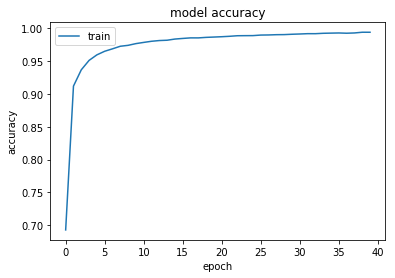

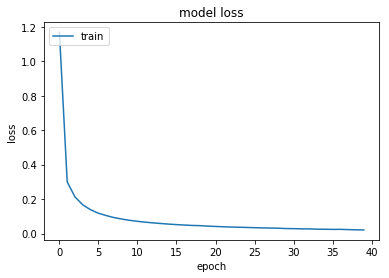

In [10]:
# summarize history for accuracy
import matplotlib.pyplot as plt
plt.plot(history.history['acc'])

plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])

plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [11]:

print('loss and accuracy on test data:',loss,accuracy)

loss and accuracy on test data: 0.04297132075284467 0.9856709957122802
